# Phys555 Assignment 2 Question 3
Karlee Zammit - V00823093

## Linear Regression and KNN

Q3- Use the Q1 regression data set for the following: 
Perform a PCA and use the first (N) best components that contain ~90% of the information. Then, repeat Q2 (A and B) with the first N components and compare the performances/plots with Q2. 
Bonus: Repeat the same steps with 50% and 70% information and compare the three cases (i.e., 50%, 70% and 90%). Add a discussion and conclusion. 

In [3]:
# Import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
print('Done!')

Done!


In [4]:
beans = pd.read_excel(r'Dry_Bean_Dataset.xlsx')
beans = beans.drop(['Class'], axis=1)

# Set temperature as the target variable
var = ['Perimeter']

# Drop temperature out of the weather data, and set it as X
X = beans.loc[:, beans.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = beans[var].copy()
print(Y.columns)

# Split the input and target data into test and train, with 75% of the data going to training, and 25% of the data going to testing
X_tr,X_va,Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.25)

# Print the shape of the split data
print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
       'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')
Index(['Perimeter'], dtype='object')
training set ==  (10208, 15) (10208,) ,, validation set ==  (3403, 15) (3403,)


In [5]:
# Normalize the data, as was done in Q2
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

# Perform PCA on the normalized data, keeping the number of components corresponding to the decimal percentage in n_components
pca = PCA(n_components=.9)
X_tr_pca = pca.fit_transform(X_tr_Norm)
X_va_pca = pca.fit_transform(X_va_Norm) # Does this need to be fit on the training data? Like we do in normalization?

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Linear Regression')

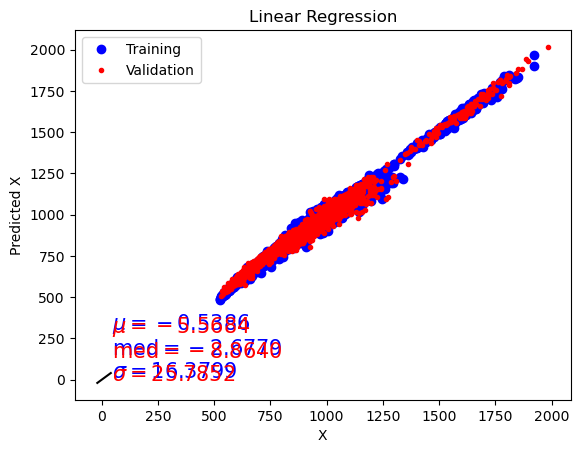

In [6]:
# Use the same linear regression model as in Q2 so the results are comparable, for the data keeping only n_components 

reg = linear_model.SGDRegressor(loss='squared_error', penalty='L2', alpha=0.001,
                               max_iter=2000, eta0=.001, tol=0.0001, learning_rate='constant', n_iter_no_change=5)

# Fit the model on the PCA data
reg.fit(X_tr_pca,Y_tr)  # fit the model with training set

#'predictions for training and validation sets'
Y_tr_pred_lr = reg.predict(X_tr_pca)  
Y_va_pred_lr = reg.predict(X_va_pca)

plt.figure(3)
plt.plot(Y_tr,Y_tr_pred_lr,'ob')
plt.plot(Y_va,Y_va_pred_lr,'.r')

plt.plot(np.arange(-20,40,.1),  np.arange(-20,40,.1),'-k')
plt.xlabel('X')
plt.ylabel('Predicted X')
plt.legend(['Training', 'Validation'], loc='best')
# plt.xlim([0,2])
# plt.ylim([0,2])

print(type(Y_tr))
print(type(Y_tr_pred_lr))

#Statistical information regarding training and validation predictions
mu_lr = np.mean(Y_tr-Y_tr_pred_lr)
median_lr = np.median(Y_tr-Y_tr_pred_lr)
sigma_lr = np.std(Y_tr-Y_tr_pred_lr)

muv_lr = np.mean(Y_va-Y_va_pred_lr)
medianv_lr = np.median(Y_va-Y_va_pred_lr)
sigmav_lr = np.std(Y_va-Y_va_pred_lr)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_lr, median_lr, sigma_lr)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv_lr, medianv_lr, sigmav_lr)

plt.text(45,10,textstr, color='b',fontsize=15)
plt.text(45,-10,textstrv, color='r',fontsize=15)
plt.title('Linear Regression')

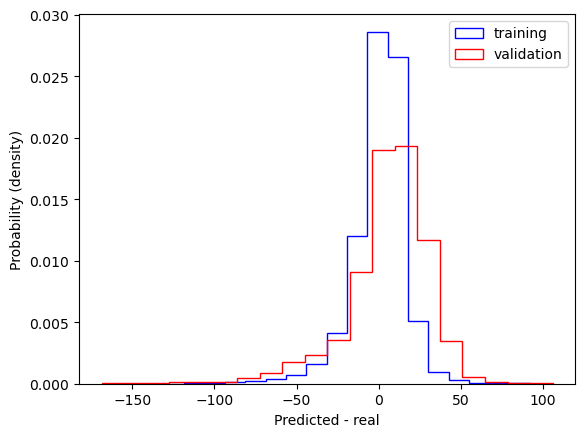

In [7]:
plt.hist(Y_tr_pred_lr-Y_tr,20,color='b',histtype='step',density=True,label='training')
plt.hist(Y_va_pred_lr-Y_va,20,color='r',histtype='step',density=True,label='validation')
plt.xlabel('Predicted - real')
plt.ylabel('Probability (density)')
plt.legend()

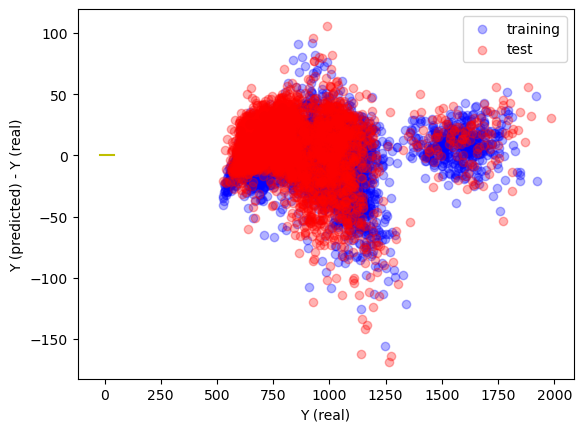

In [8]:
plt.scatter(Y_tr,Y_tr_pred_lr-Y_tr,label='training',color='b',alpha=.3)
plt.scatter(Y_va,Y_va_pred_lr-Y_va,label='test',color='r',alpha=.3)
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([-20,40],[0,0],'y')
#plt.ylim([-1,1])
plt.legend()

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 50, 'p': 2, 'weights': 'uniform'}


Text(0.5, 1.0, 'KNN Regression')

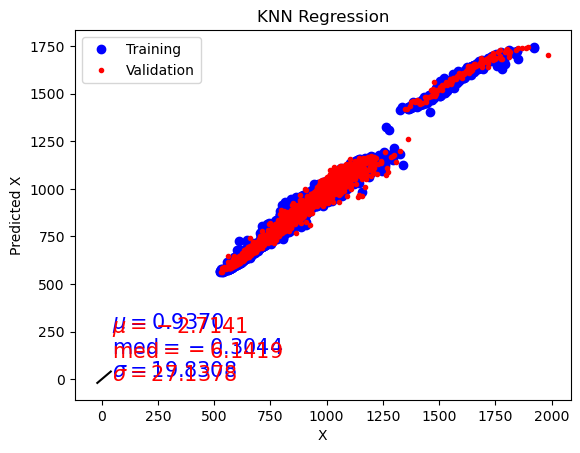

In [9]:
from sklearn.neighbors import KNeighborsRegressor  # choose your model

KNN = KNeighborsRegressor(n_neighbors=50, weights='uniform')  # set the hyperparameters
print (KNN.get_params())
KNN.fit(X_tr_pca,Y_tr)  # train it

#'predictions for training and validation sets'
Y_tr_pred= KNN.predict(X_tr_pca)  
Y_va_pred= KNN.predict(X_va_pca)

plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

plt.plot(np.arange(-20,40,.1),  np.arange(-20,40,.1),'-k')
plt.xlabel('X')
plt.ylabel('Predicted X')
plt.legend(['Training', 'Validation'])
# plt.xlim([0,2])
# plt.ylim([0,2])

#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)


plt.text(45,10,textstr, color='b',fontsize=15)
plt.text(45,-10,textstrv, color='r',fontsize=15)
plt.title('KNN Regression')

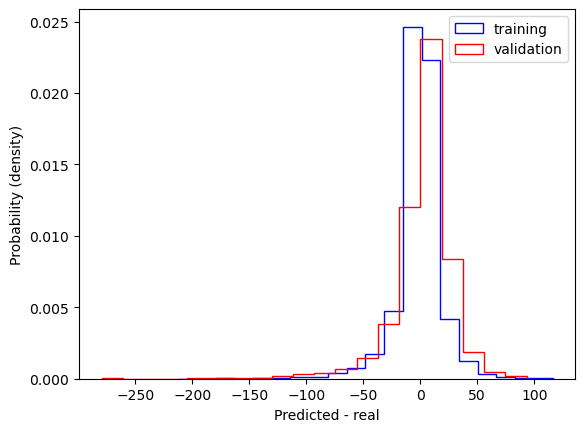

In [10]:
plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
plt.xlabel('Predicted - real')
plt.ylabel('Probability (density)')
plt.legend()


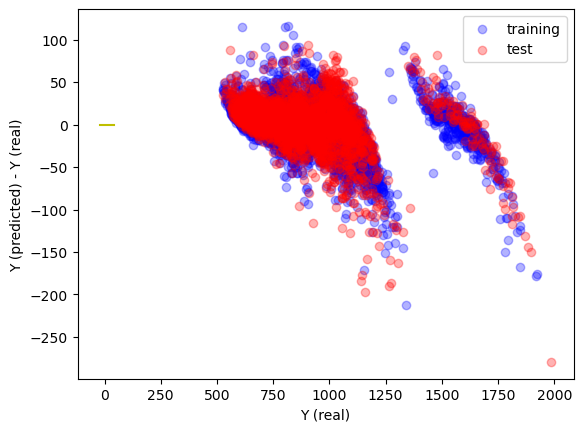

In [11]:
plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([-20,40],[0,0],'y')
#plt.ylim([-1,1])
plt.legend()

## References

